# Test

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("./temp_data_set/OFFC_EMY.csv")
data['Time'] = pd.to_datetime(data['Time'])
data['Seconds'] = (data['Time'] - data['Time'].min()).dt.total_seconds()

temperatureValue = data['Temp'].values.astype(float)
timeValue = data['Seconds'].values.reshape(-1, 1)  # sklearn attend 2D

# Périodes annuelle et journalière
periode_annee = 365 * 24 * 3600
omega_annee = 2 * np.pi / periode_annee
periode_jour = 24 * 3600
omega_jour = 2 * np.pi / periode_jour

# Features sinusoïdales
Xsin_annee = np.sin(omega_annee * timeValue)
Xcos_annee = np.cos(omega_annee * timeValue)
Xsin_jour = np.sin(omega_jour * timeValue)
Xcos_jour = np.cos(omega_jour * timeValue)

# Ajout d'un bruit gaussien simple
np.random.seed(42)
bruit = np.random.normal(0, 0.5, size=timeValue.shape)

# Matrice de features
x = np.hstack((timeValue, Xsin_annee, Xcos_annee, Xsin_jour, Xcos_jour))
y = temperatureValue + bruit.flatten()

# Entraînement du modèle
model = LinearRegression()
model.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
from datetime import datetime

# Récupérer l'instant présent
now = datetime.now()

# Convertir en secondes depuis le début du dataset
seconds_now = (now - data['Time'].min()).total_seconds()

# Calculer les features pour la prédiction (annuelle + journalière)
X_now = np.array([
    [
        seconds_now,
        np.sin(omega_annee * seconds_now),
        np.cos(omega_annee * seconds_now),
        np.sin(omega_jour * seconds_now),
        np.cos(omega_jour * seconds_now)
    ]
])

# Prédire la température
temp_now = model.predict(X_now)[0]
print(f"Température simulée à l'instant présent : {temp_now:.2f}°C")


Température simulée à l'instant présent : 9.06°C


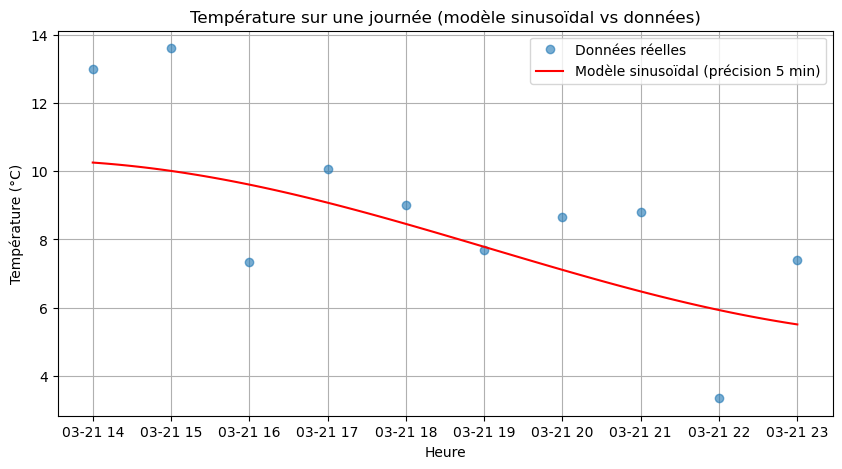

In [24]:
# Plot température sur une journée (précision 5 min) avec modèle sinusoïdal
import matplotlib.pyplot as plt

# Sélection d'une journée (premier jour du dataset)
jour_debut = data['Time'].dt.date.min()
mask_jour = data['Time'].dt.date == jour_debut

data_jour = data[mask_jour]

# Générer les timestamps toutes les 5 minutes sur la journée
heures_5min = pd.date_range(start=data_jour['Time'].min(), end=data_jour['Time'].max(), freq='5min')
seconds_5min = (heures_5min - data['Time'].min()).total_seconds()
seconds_5min = np.array(seconds_5min).reshape(-1, 1)

# Créer les features sinusoïdales pour le modèle
X_5min = np.hstack([
    seconds_5min,
    np.sin(omega_annee * seconds_5min),
    np.cos(omega_annee * seconds_5min),
    np.sin(omega_jour * seconds_5min),
    np.cos(omega_jour * seconds_5min)
])

# Prédiction modèle sinusoïdal
temp_model_5min = model.predict(X_5min)

plt.figure(figsize=(10,5))
plt.plot(data_jour['Time'], data_jour['Temp'], label='Données réelles', marker='o', linestyle='None', alpha=0.6)
plt.plot(heures_5min, temp_model_5min, label='Modèle sinusoïdal (précision 5 min)', color='red')
plt.xlabel('Heure')
plt.ylabel('Température (°C)')
plt.title('Température sur une journée (modèle sinusoïdal vs données)')
plt.legend()
plt.grid()
plt.show()


C:\Users\sebas\AppData\Local\Temp\ipykernel_3396\2143812407.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  heures_1h = pd.date_range(start=data['Time'].min(), end=data['Time'].max(), freq='1H')


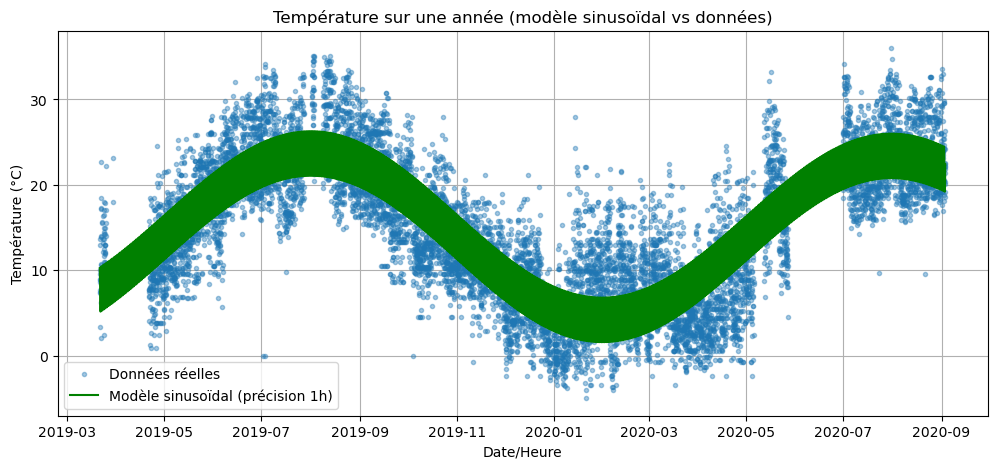

In [25]:
# Plot température sur une année (précision 1h) avec modèle sinusoïdal

# Générer les timestamps toutes les heures sur la période du dataset
heures_1h = pd.date_range(start=data['Time'].min(), end=data['Time'].max(), freq='1H')
seconds_1h = (heures_1h - data['Time'].min()).total_seconds()
seconds_1h = np.array(seconds_1h).reshape(-1, 1)

# Créer les features sinusoïdales pour le modèle
X_1h = np.hstack([
    seconds_1h,
    np.sin(omega_annee * seconds_1h),
    np.cos(omega_annee * seconds_1h),
    np.sin(omega_jour * seconds_1h),
    np.cos(omega_jour * seconds_1h)
])

# Prédiction modèle sinusoïdal
temp_model_1h = model.predict(X_1h)

plt.figure(figsize=(12,5))
plt.plot(data['Time'], data['Temp'], label='Données réelles', marker='.', linestyle='None', alpha=0.4)
plt.plot(heures_1h, temp_model_1h, label='Modèle sinusoïdal (précision 1h)', color='green')
plt.xlabel('Date/Heure')
plt.ylabel('Température (°C)')
plt.title('Température sur une année (modèle sinusoïdal vs données)')
plt.legend()
plt.grid()
plt.show()


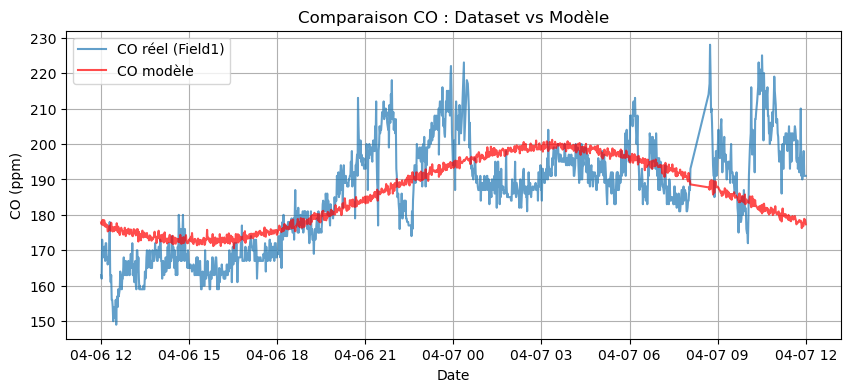

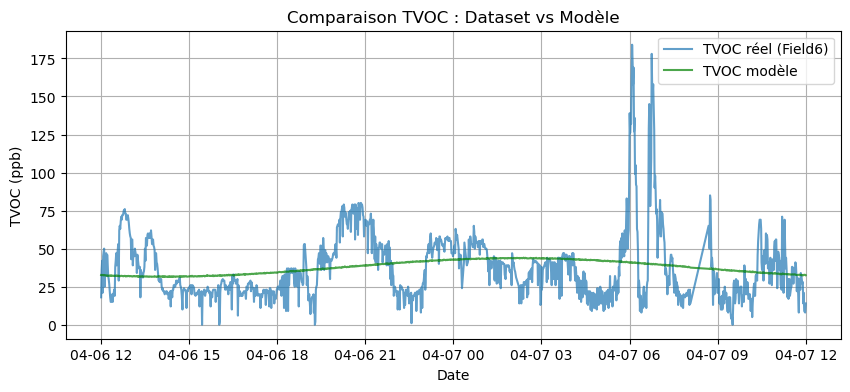

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger le dataset
data = pd.read_csv("./data_set/indoor_data.csv")
data['created_at'] = pd.to_datetime(data['created_at'])
data['Seconds'] = (data['created_at'] - data['created_at'].min()).dt.total_seconds()

coValue = data['field1'].values.astype(float)
tvocValue = data['field6'].values.astype(float)
timeValue = data['Seconds'].values.astype(float).reshape(-1, 1)

# Modélisation
periode_jour = 24 * 3600
omega_jour = 2 * np.pi / periode_jour
Xsin_jour = np.sin(omega_jour * timeValue)
Xcos_jour = np.cos(omega_jour * timeValue)
np.random.seed(42)
noise = np.random.normal(0, 1, size=timeValue.shape)
X = np.hstack((Xsin_jour, Xcos_jour, noise))

# Entraînement
model_co = LinearRegression()
model_co.fit(X, coValue + noise.flatten())
model_tvoc = LinearRegression()
model_tvoc.fit(X, tvocValue + noise.flatten())

# Prédiction sur tout le dataset
co_pred = model_co.predict(X)
tvoc_pred = model_tvoc.predict(X)

# Plot CO
plt.figure(figsize=(10,4))
plt.plot(data['created_at'], coValue, label='CO réel (Field1)', alpha=0.7)
plt.plot(data['created_at'], co_pred, label='CO modèle', color='red', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('CO (ppm)')
plt.title('Comparaison CO : Dataset vs Modèle')
plt.legend()
plt.grid()
plt.show()

# Plot TVOC
plt.figure(figsize=(10,4))
plt.plot(data['created_at'], tvocValue, label='TVOC réel (Field6)', alpha=0.7)
plt.plot(data['created_at'], tvoc_pred, label='TVOC modèle', color='green', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('TVOC (ppb)')
plt.title('Comparaison TVOC : Dataset vs Modèle')
plt.legend()
plt.grid()
plt.show()

In [9]:
import random
random.uniform(0.10, 1.50)

1.2919201302014363